<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Unsupervised-Learning/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [5]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [0]:
data=data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


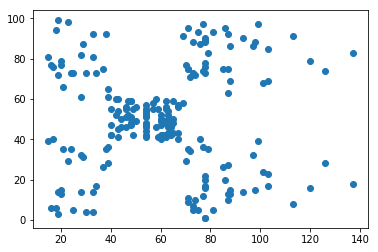

In [8]:
plt.scatter(data[['Annual Income (k$)']], data[['Spending Score (1-100)']])

In [0]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmm=KMeans(i, init='k-means++', n_init=15, max_iter=300)
  kmm.fit(data)
  wcss.append(kmm.inertia_)
  

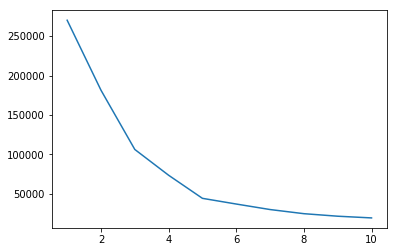

In [11]:
plt.plot(range(1,11,1), wcss)

In [0]:
from sklearn.cluster import KMeans
km=KMeans(5, init='k-means++', n_init=15, max_iter=300)



In [0]:
y_hat=km.fit_predict(data)

In [14]:
y_hat.shape

(200,)

In [15]:
data[y_hat==0]['Annual Income (k$)']


0     15
2     16
4     17
6     18
8     19
10    19
12    20
14    20
16    21
18    23
20    24
22    25
24    28
26    28
28    29
30    30
32    33
34    33
36    34
38    37
40    38
42    39
44    39
Name: Annual Income (k$), dtype: int64

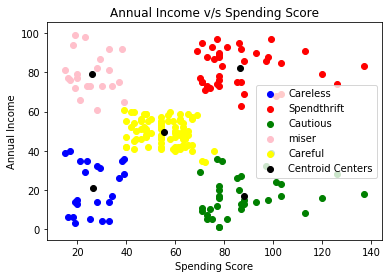

In [24]:
plt.scatter(data[y_hat==0]['Annual Income (k$)'], data[y_hat==0]['Spending Score (1-100)'], color='blue', label='Careless')
plt.scatter(data[y_hat==1]['Annual Income (k$)'], data[y_hat==1]['Spending Score (1-100)'], color='red', label='Spendthrift')
plt.scatter(data[y_hat==2]['Annual Income (k$)'], data[y_hat==2]['Spending Score (1-100)'], color='green', label='Cautious')
plt.scatter(data[y_hat==3]['Annual Income (k$)'], data[y_hat==3]['Spending Score (1-100)'], color='pink', label='miser')
plt.scatter(data[y_hat==4]['Annual Income (k$)'], data[y_hat==4]['Spending Score (1-100)'], color='yellow', label='Careful')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color='black', label='Centroid Centers')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Annual Income v/s Spending Score')
plt.legend()
plt.show()